In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
file_path = r'C:\Users\bhava\Downloads\diamonds (cleaned).csv'
data = pd.read_csv(file_path)

In [3]:
data

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,None,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,None,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,None,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,None,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,None,6.80,5.05,3.50,3050,GIA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,None,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,None,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,None,5.59,5.51,4.00,3270,GIA,None
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,None,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [4]:
# Handling missing values
data_cleaned = data.copy()
numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

In [5]:
data_cleaned

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,None,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,None,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,None,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,None,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,None,6.80,5.05,3.50,3050,GIA,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,Pear,NaN,F,VS2,1.02,1.54,62.9,63.0,Excellent,Very Good,Thick to Very Thick,None,8.60,5.59,3.51,3760,GIA,Medium
6481,Heart,NaN,E,VVS2,1.00,1.16,58.3,59.0,Excellent,Excellent,Slightly Thick to Very Thick,None,6.05,6.99,4.07,4710,GIA,Strong
6482,Princess,Ideal,G,VVS1,1.03,1.01,72.6,71.0,Excellent,Excellent,Medium to Slightly Thick,None,5.59,5.51,4.00,3270,GIA,None
6483,Radiant,NaN,E,VS1,1.06,1.43,67.8,62.0,Excellent,Excellent,Slightly Thick to Thick,None,7.24,5.05,3.42,1050,GIA Lab-Grown,NaN


In [6]:
# Fill missing numerical data with median
for col in numerical_cols:
    data_cleaned[col].fillna(data_cleaned[col].median(), inplace=True)

# Fill missing categorical data with mode
for col in categorical_cols:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

# Check for remaining missing values
print("Missing values in the dataset:\n", data_cleaned.isnull().sum())

Missing values in the dataset:
 Shape                 0
Cut                   0
Color                 0
Clarity               0
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Polish                0
Symmetry              0
Girdle                0
Culet                 0
Length                0
Width                 0
Height                0
Price                 0
Type                  0
Fluorescence          0
dtype: int64


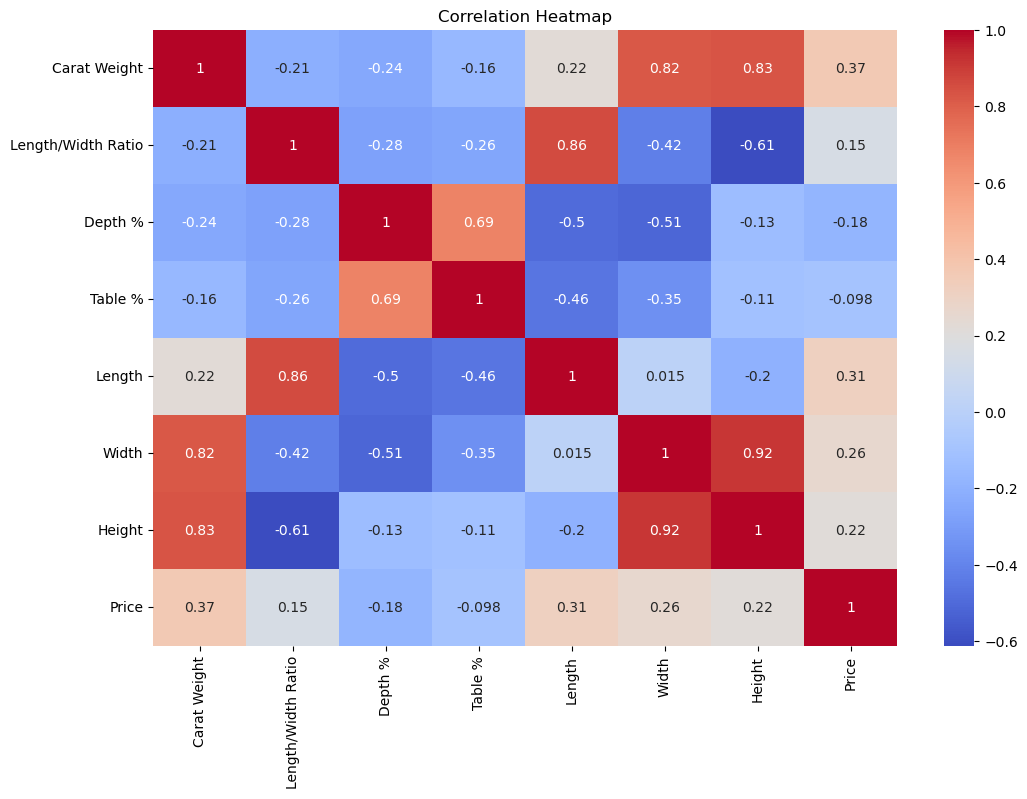

In [7]:
# Exploratory Data Analysis: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_cleaned[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Encode categorical features using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

In [9]:
# Split dataset into features (X) and target (y)
X = data_cleaned.drop(columns=['Price'])
y = data_cleaned['Price']

In [10]:
X

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Type,Fluorescence
0,1,2,2,5,1.84,1.02,65.8,59.0,0,2,7,1,7.09,6.95,4.57,1,2
1,6,2,1,2,1.20,1.65,62.5,58.0,2,2,7,1,9.64,5.86,3.66,1,2
2,5,2,1,2,1.19,1.41,63.1,63.0,2,2,7,1,8.44,6.00,3.79,1,2
3,3,2,0,1,1.00,1.18,61.7,58.0,0,0,13,1,5.85,6.89,4.25,0,0
4,8,2,4,2,1.01,1.35,69.4,66.0,0,2,14,1,6.80,5.05,3.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,6,2,2,3,1.02,1.54,62.9,63.0,0,2,16,1,8.60,5.59,3.51,0,1
6481,3,2,1,5,1.00,1.16,58.3,59.0,0,0,13,1,6.05,6.99,4.07,0,3
6482,7,2,3,4,1.03,1.01,72.6,71.0,0,0,6,1,5.59,5.51,4.00,0,2
6483,8,2,1,2,1.06,1.43,67.8,62.0,0,0,12,1,7.24,5.05,3.42,1,2


In [11]:
y

0       2640
1       1070
2       1070
3       7110
4       3050
        ... 
6480    3760
6481    4710
6482    3270
6483    1050
6484    2870
Name: Price, Length: 6485, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Type,Fluorescence
877,9,1,0,2,1.58,1.00,61.8,58.0,0,0,6,1,7.44,7.47,4.61,1,2
6095,5,2,1,2,1.05,1.48,63.2,60.0,0,0,6,2,8.31,5.62,3.55,2,2
6052,9,1,4,3,1.05,1.01,62.8,56.0,0,0,9,1,6.42,6.48,4.05,0,2
293,7,2,2,5,1.01,1.00,73.7,70.0,0,0,12,1,5.37,5.35,3.95,0,2
6138,9,3,4,3,1.00,1.01,63.0,57.0,0,2,12,1,6.22,6.31,3.94,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,6,2,0,2,1.05,1.56,61.3,58.0,2,0,20,1,9.07,5.80,3.55,1,2
5191,8,2,4,3,1.00,1.44,68.2,68.0,0,0,16,1,7.07,4.91,3.35,0,2
5226,8,2,2,2,1.14,1.43,68.0,65.0,0,0,6,2,7.32,5.12,3.48,2,2
5390,5,2,1,3,1.01,1.41,62.8,60.0,0,0,8,1,7.85,5.58,3.50,0,2


In [14]:
X_test

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Type,Fluorescence
3095,5,2,1,2,1.03,1.35,64.0,56.0,0,0,12,1,7.67,5.67,3.63,0,0
5455,4,2,0,2,1.07,2.04,63.0,56.0,0,0,6,2,10.74,5.27,3.32,2,2
3480,9,3,4,4,1.01,1.01,64.7,56.0,0,0,12,1,6.24,6.28,4.05,0,2
706,6,2,2,4,1.01,1.55,57.5,56.0,2,0,21,1,8.86,5.70,3.28,0,1
5763,3,2,1,2,1.50,1.13,53.8,65.0,0,0,6,2,7.17,8.07,4.34,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908,7,2,0,2,1.00,1.02,72.5,66.0,0,0,6,2,5.50,5.41,3.92,2,2
5485,5,2,2,2,1.01,1.44,62.8,57.0,0,0,13,1,7.90,5.48,3.45,0,1
4253,5,2,0,5,1.00,1.56,57.1,64.0,0,2,8,1,8.67,5.54,3.16,0,1
5432,4,2,4,3,1.01,1.81,64.9,61.0,0,0,13,1,9.39,5.19,3.37,0,2


In [15]:
y_train

877     1850
6095    1030
6052    3810
293     3640
6138    3230
        ... 
3772    1090
5191    2970
5226    1170
5390    4840
860     4000
Name: Price, Length: 5188, dtype: int64

In [16]:
y_test

3095    4570
5455    1170
3480    3930
706     4890
5763    1930
        ... 
4908    1080
5485    3890
4253    4790
5432    4260
947     1390
Name: Price, Length: 1297, dtype: int64

In [17]:
# Apply a Random Forest Regressor as a baseline model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
rf_model

RandomForestRegressor(random_state=42)

In [19]:
# Predictions and performance metrics
y_pred = rf_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Random Forest Regressor Performance:\nRMSE: {rmse:.2f}\nR2 Score: {r2:.4f}")

Random Forest Regressor Performance:
RMSE: 1340.73
R2 Score: 0.8311


In [20]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Function to train models and calculate metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:\nRMSE: {rmse:.2f}\nR2 Score: {r2:.4f}\n")
    return rmse, r2

# Linear Regression
lr_model = LinearRegression()
evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Linear Regression")

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree Regressor")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting Regressor")

# Support Vector Regressor
svr_model = SVR(kernel='rbf')
evaluate_model(svr_model, X_train, y_train, X_test, y_test, "Support Vector Regressor")

# Random Forest Regressor
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest Regressor")


Linear Regression Performance:
RMSE: 2028.02
R2 Score: 0.6135

Decision Tree Regressor Performance:
RMSE: 1897.73
R2 Score: 0.6616

Gradient Boosting Regressor Performance:
RMSE: 1356.14
R2 Score: 0.8272

Support Vector Regressor Performance:
RMSE: 3262.08
R2 Score: -0.0000

Random Forest Regressor Performance:
RMSE: 1340.73
R2 Score: 0.8311



(1340.729573411523, 0.8310720661743436)

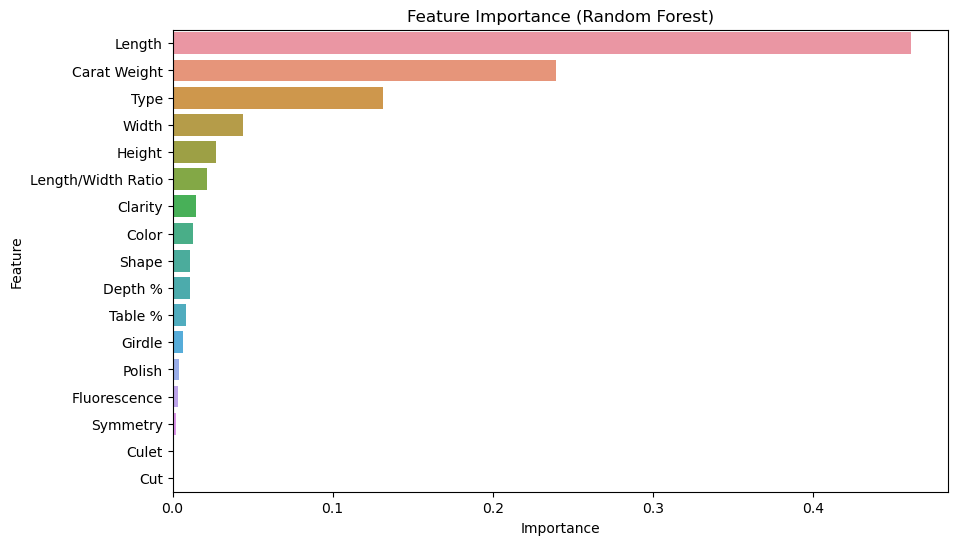

In [21]:
#Feature control analysis(Determine which features contribute most to predicting the price.)
# Feature importance from the Random Forest model
importances = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance (Random Forest)')
plt.show()


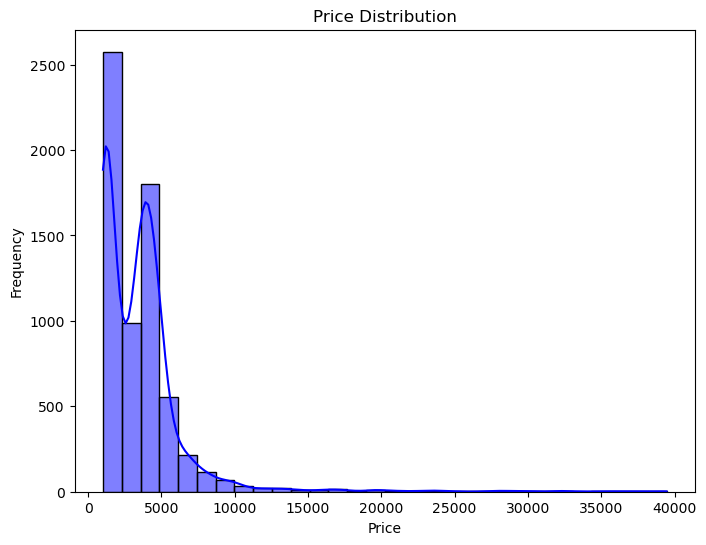

In [22]:
#Price Distribution Analysis(Analyze the distribution of the target variable (Price).)
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [23]:
print(data_cleaned.columns)

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence'],
      dtype='object')


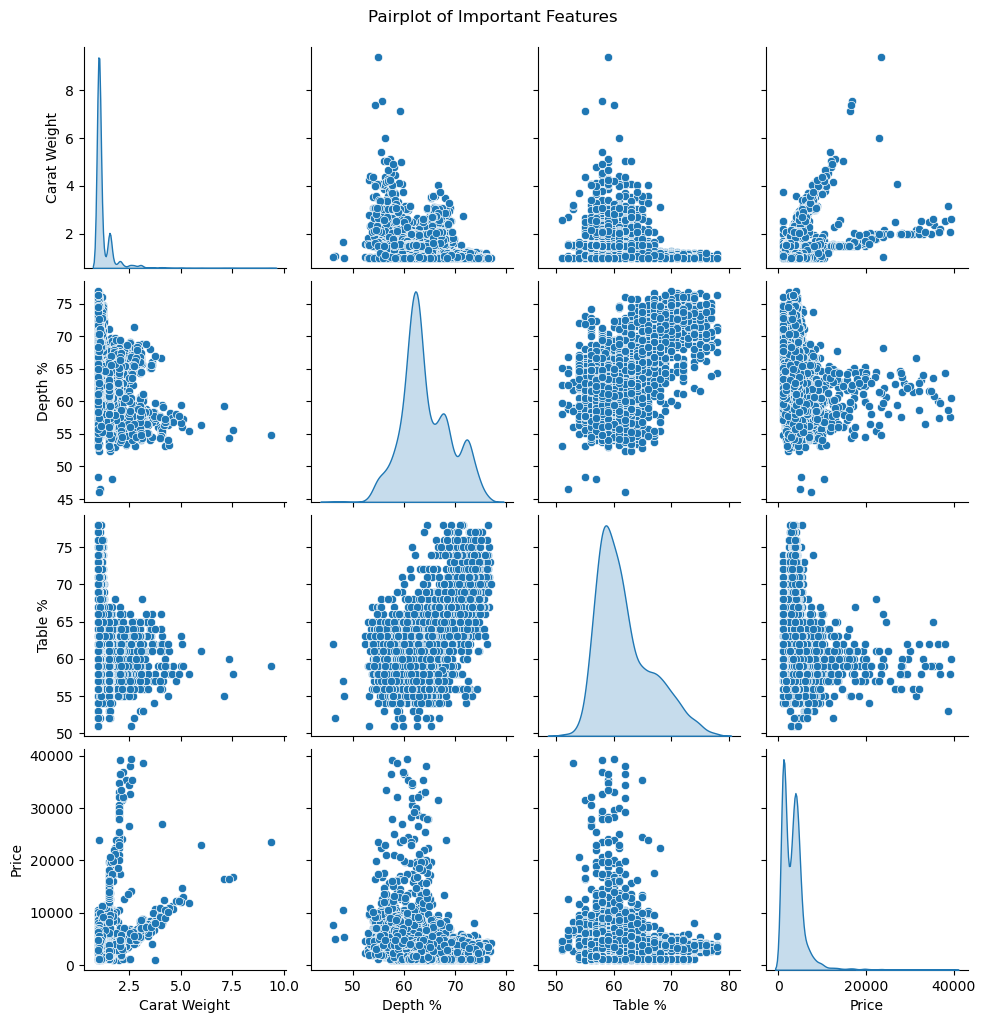

In [24]:
#Pairplot to Visualize Relationships(Visualize relationships between important numerical features and the price.)
important_features = ['Carat Weight', 'Depth %', 'Table %', 'Price']
sns.pairplot(data_cleaned[important_features], diag_kind='kde', kind='scatter')
plt.suptitle('Pairplot of Important Features', y=1.02)
plt.show()


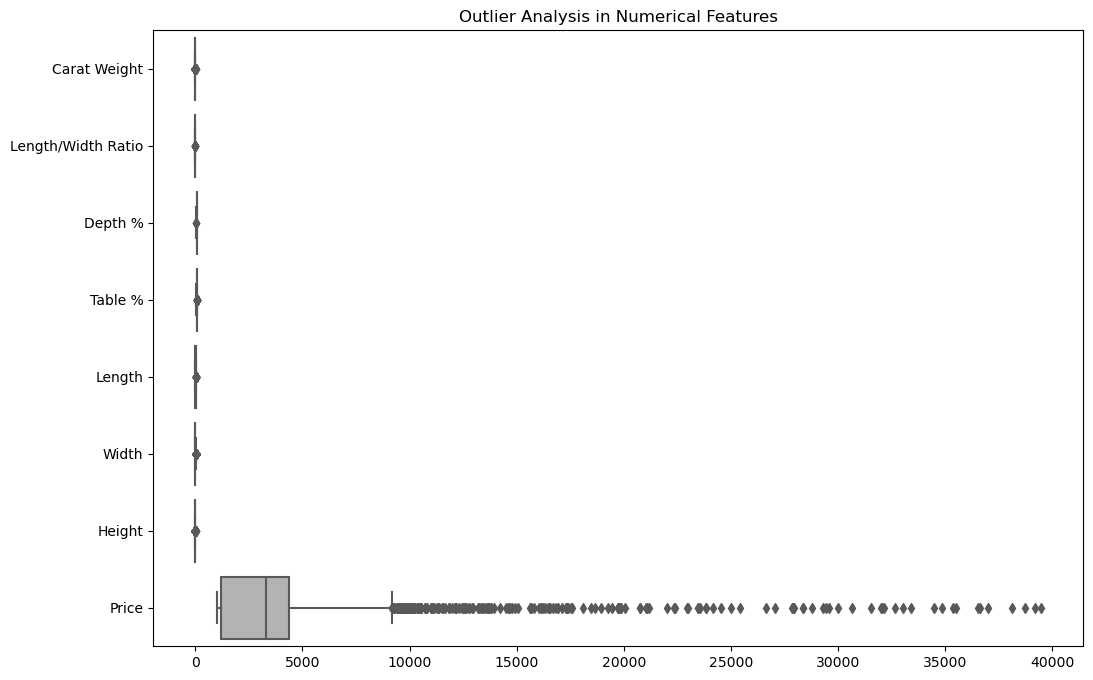

In [25]:
#. Outlier Detection(Identify potential outliers in the numerical features.)
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned[numerical_cols], orient='h', palette='Set2')
plt.title('Outlier Analysis in Numerical Features')
plt.show()


C:\Users\bhava\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


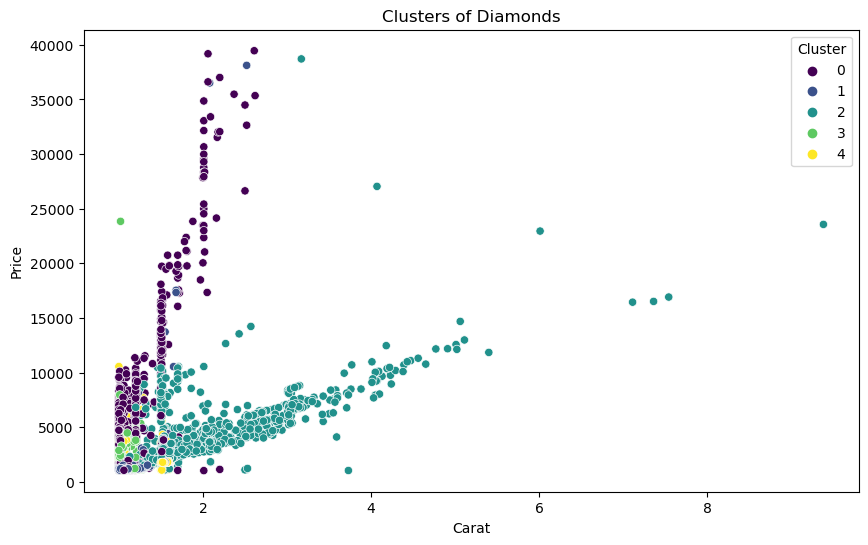

In [26]:
#Clustering Analysis(Group similar diamonds based on their attributes (e.g., using K-Means).)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to the dataset
data_cleaned['Cluster'] = clusters

# Visualize clusters with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Carat Weight', y='Price', hue='Cluster', data=data_cleaned, palette='viridis')
plt.title('Clusters of Diamonds')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

C:\Users\bhava\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Performance:
MAE: 937.41


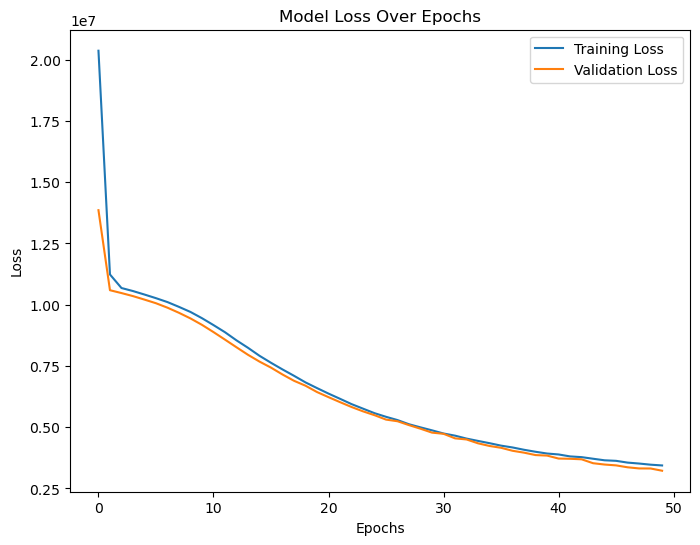

In [27]:
#Price Prediction Using Neural Networks(Train a simple neural network to predict prices.)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Evaluate the model
loss, mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Performance:\nMAE: {mae:.2f}")

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

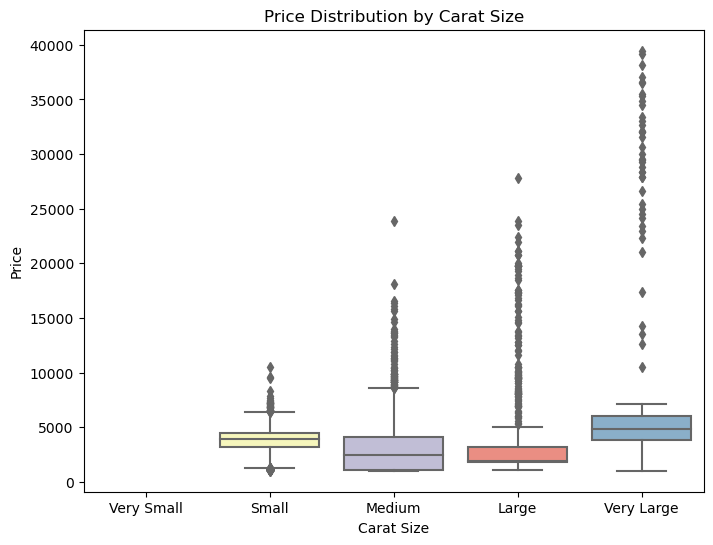

In [31]:
# Data Binning(Group numerical features like carat into bins (e.g., small, medium, large) to analyze patterns.)
# Create carat bins
bins = [0, 0.5, 1.0, 1.5, 2.0, 3.0]
labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
data_cleaned['Carat_Bin'] = pd.cut(data_cleaned['Carat Weight'], bins=bins, labels=labels)

# Analyze price distribution across carat bins
plt.figure(figsize=(8, 6))
sns.boxplot(x='Carat_Bin', y='Price', data=data_cleaned, palette='Set3')
plt.title('Price Distribution by Carat Size')
plt.xlabel('Carat Size')
plt.ylabel('Price')
plt.show()

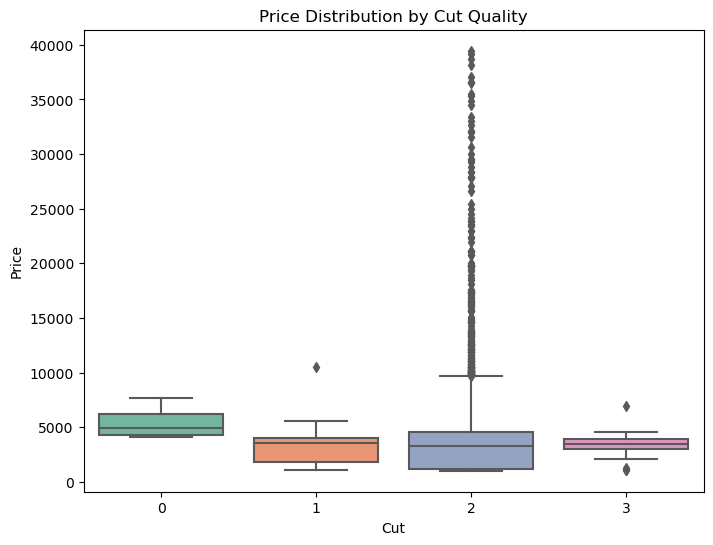

In [32]:
#Categorical Feature Analysis(Examine the impact of categorical features (cut, color, clarity) on price.)
# Boxplot for Cut vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cut', y='Price', data=data_cleaned, palette='Set2')
plt.title('Price Distribution by Cut Quality')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

# Similar plots can be done for 'color' and 'clarity'

In [34]:
print(data_cleaned.columns)

Index(['Shape', 'Cut', 'Color', 'Clarity', 'Carat Weight',
       'Length/Width Ratio', 'Depth %', 'Table %', 'Polish', 'Symmetry',
       'Girdle', 'Culet', 'Length', 'Width', 'Height', 'Price', 'Type',
       'Fluorescence', 'Cluster', 'Carat_Bin'],
      dtype='object')


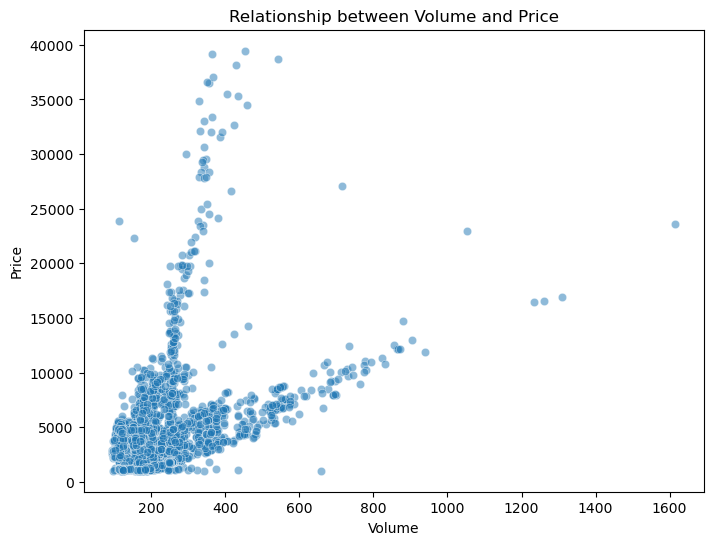

In [42]:
#Interaction Features(Create new features by combining existing ones. For example:Volume: Estimate the approximate volume of the diamond using x, y, and z.)
# Create a new feature: Volume
# Rename columns (if necessary)
data_cleaned.rename(columns={'Length': 'x', 'Width': 'y', 'Height': 'z'}, inplace=True)

# Ensure no missing values in x, y, z
data_cleaned = data_cleaned.dropna(subset=['x', 'y', 'z'])

# Calculate volume
data_cleaned['volume'] = data_cleaned['x'] * data_cleaned['y'] * data_cleaned['z']

# Plot relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volume', y='Price', data=data_cleaned, alpha=0.5)
plt.title('Relationship between Volume and Price')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.show()



In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBoost model with hyperparameter tuning
xgb_model = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)

best_xgb_model = grid_search.best_estimator_
evaluate_model(best_xgb_model, X_train, y_train, X_test, y_test, "XGBoost Regressor")


XGBoost Regressor Performance:
RMSE: 1290.78
R2 Score: 0.8434



(1290.7786451175966, 0.8434249223931927)

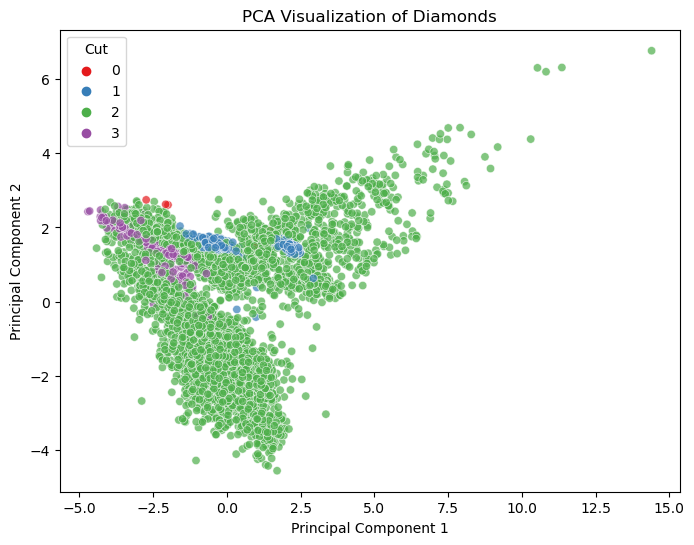

In [39]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_cleaned['Cut'], palette='Set1', alpha=0.7)
plt.title('PCA Visualization of Diamonds')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

# Evaluate Random Forest using cross-validation
cv_scores = cross_val_score(rf_model, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = (-cv_scores) ** 0.5
print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f}")


Cross-Validation RMSE: 1223.11
